**Импорт данных**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [3]:
anime = pd.read_csv("anime.csv", low_memory=False)
rating = pd.read_csv("rating.csv")

**Просмотр данных**

In [4]:
anime.head(20)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [5]:
rating.head(20)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [6]:
print(anime.shape)
print(rating.shape)

(12294, 7)
(7813737, 3)


In [7]:
data=anime.merge(rating,on='anime_id')

Объединяю anime.csv и rating.csv

In [8]:
data.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   name      object 
 2   genre     object 
 3   type      object 
 4   episodes  object 
 5   rating_x  float64
 6   members   int64  
 7   user_id   int64  
 8   rating_y  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 596.1+ MB


Всего в наборе данных у нас 9 столбцов: 4 столбца типа int(числовой), 4 столбца типа object(текстовый), 1 столбец типа float(с плавающей точкой).
anime_id - id аниме в наборе данных;
name - название аниме;
genre - жанр аниме;
type - тип аниме(Фильм, сериал);
episodes - количество эпизодов;
rating_x - рейтинг аниме;
мемберс - участники аниме;
user_id - id пользователя;
rating_y - рейтинг определенному аниме, который дал пользователь.


In [10]:
data.describe()

,anime_id,rating_x,members,user_id,rating_y
count,7.813727e+06,7.813721e+06,7.813727e+06,7.813727e+06,7.813727e+06
mean,8.909045e+03,7.653127e+00,1.786208e+05,3.672795e+04,6.144036e+00
std,8.883923e+03,6.730287e-01,1.881764e+05,2.099795e+04,3.727796e+00
min,1.000000e+00,1.670000e+00,2.900000e+01,1.000000e+00,-1.000000e+00
25%,1.240000e+03,7.270000e+00,4.403000e+04,1.897400e+04,6.000000e+00
50%,6.213000e+03,7.680000e+00,1.104700e+05,3.679100e+04,7.000000e+00
75%,1.409300e+04,8.130000e+00,2.442680e+05,5.475700e+04,9.000000e+00
max,3.451900e+04,9.500000e+00,1.013917e+06,7.351600e+04,1.000000e+01


In [11]:
df=data.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

Создаю копию DataFrame data и присваивает её переменной df, удаляю, все строки в DataFrame df, которые содержат хотя бы одно значение NaN, cбрасываю индексы в DataFrame df. Восстанавливаю последовательность индексов методом reset_index.

In [12]:
df.drop(columns=["episodes","members"],axis=1,inplace=True)
df.drop(index=df[df["rating_x"]==0].index,inplace=True)

Удаляю столбцы episodes и members за ненадобностью и рейтинги с значением 0 в столбце рейтинга аниме.


In [13]:
df.rename(columns={'rating_x': 'Anime_rating'}, inplace=True)

Переименовываю rating_x в Anime_rating для понятности.

In [14]:
df.rename(columns={'rating_y': 'Users_anime_rating'}, inplace=True)

Переименовываю rating_y в Users_anime_rating для понятности.

In [15]:
df.shape

(7813611, 7)

In [16]:
df.describe()

,anime_id,Anime_rating,user_id,Users_anime_rating
count,7.813611e+06,7.813611e+06,7.813611e+06,7.813611e+06
mean,8.908729e+03,7.653158e+00,3.672799e+04,6.144075e+00
std,8.883598e+03,6.729753e-01,2.099792e+04,3.727792e+00
min,1.000000e+00,1.670000e+00,1.000000e+00,-1.000000e+00
25%,1.240000e+03,7.270000e+00,1.897400e+04,6.000000e+00
50%,6.213000e+03,7.680000e+00,3.679100e+04,7.000000e+00
75%,1.409300e+04,8.130000e+00,5.475800e+04,9.000000e+00
max,3.451900e+04,9.500000e+00,7.351600e+04,1.000000e+01


In [17]:
import re  

df["name"] = df["name"].apply(lambda x: re.sub("[W_]+", " ", x).strip())

Удаляю все неалфавитные символы из названий аниме и заменяю их на пробелы.

In [18]:
df.head(10)

,anime_id,name,genre,type,Anime_rating,user_id,Users_anime_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,278,-1
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,322,10
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,398,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,462,8
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,490,10
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,548,10


In [19]:
df['Anime_rating'] = df['Anime_rating'].round()

Округляю Anime_raiting до целых значений, потому что изначально этот столбец с типом данных float.

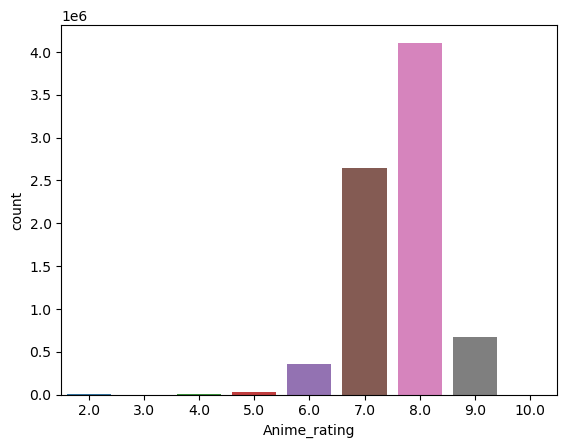

In [20]:
sns.countplot(data=df , x='Anime_rating')
plt.show()

Из этого графика можем сделать вывод, что чаще всего пользователи ставят оценку 8. Самые не популярные оценки это 2, 4, 5.

In [21]:
avg_ratings = df.groupby('name')['Anime_rating'].mean().reset_index().rename(columns={'Anime_rating': 'avg_rating'})

avg=pd.DataFrame(avg_ratings).sort_values('avg_rating',ascending=False)

In [22]:
avg.head(10)

,name,avg_rating
6473,Mogura no Motoro,10.0
3323,Hajime no Ippo: New Challenger,9.0
2403,Evangelion: 2.0 You Can (Not) Advance,9.0
2154,Doukyuusei (Movie),9.0
737,Bakemono no Ko,9.0
10430,Usagi Drop,9.0
1544,Code Geass: Hangyaku no Lelouch,9.0
5011,Kiseijuu: Sei no Kakuritsu,9.0
1548,Code Geass: Hangyaku no Lelouch R2,9.0
7659,Ping Pong The Animation,9.0


По среднему рейтингу видно, что всего одно аниме оценилось в 10 баллов.

In [23]:
cnt_ratings = df.groupby('name')['Anime_rating'].count().reset_index().rename(columns={'Anime_rating': 'count_rating'})

cnt=pd.DataFrame(cnt_ratings).sort_values('count_rating',ascending=False)

Количество оценок на каждое аниме.

In [24]:
cnt.head(10)

,name,count_rating
1828,Death Note,39340
9488,Sword Art Online,30583
8835,Shingeki no Kyojin,29584
1544,Code Geass: Hangyaku no Lelouch,27718
2353,Elfen Lied,27506
389,Angel Beats!,27183
6761,Naruto,25925
2588,Fullmetal Alchemist,25032
2589,Fullmetal Alchemist: Brotherhood,24574
10084,Toradora!,24283


Аниме с большим количеством оценок "Тетрадь смерти" - 39340 оценок.

In [25]:
popularite=avg.merge(cnt,on='name')

In [26]:
popularite.head(10)

,name,avg_rating,count_rating
0,Mogura no Motoro,10.0,1
1,Hajime no Ippo: New Challenger,9.0,3677
2,Evangelion: 2.0 You Can (Not) Advance,9.0,8001
3,Doukyuusei (Movie),9.0,485
4,Bakemono no Ko,9.0,1869
5,Usagi Drop,9.0,6958
6,Code Geass: Hangyaku no Lelouch,9.0,27718
7,Kiseijuu: Sei no Kakuritsu,9.0,11564
8,Code Geass: Hangyaku no Lelouch R2,9.0,24242
9,Ping Pong The Animation,9.0,2321


Аниме с самым большим рейтингом вместе с количеством оценок.

In [27]:
popularite.tail(10)

,name,avg_rating,count_rating
11148,Aki no Puzzle,3.0,9
11149,Soujuu Senshi Psychic ars,3.0,60
11150,Paper Film,3.0,1
11151,Riding the Storm,3.0,1
11152,Utsu Musume Sayuri,2.0,91
11153,Hametsu no Mars,2.0,1131
11154,Roboteuwang Sseonsyakeu,2.0,2
11155,Platonic Chain: Ansatsu Jikkouchuu,2.0,1
11156,Tenkuu Danzai Skelter+Heaven,2.0,237
11157,Hi Gekiga Ukiyoe Senya Ichiya,2.0,2


Самые не популярные аниме с худшими оценками.

In [28]:
v=popularite["count_rating"]
R=popularite["avg_rating"]
m=v.quantile(0.90)
c=R.mean()
popularite['w_score']=((v*R) + (m*c)) / (v+m)

In [29]:
popularite["count_rating"].describe()

count    11158.000000
mean       700.269851
std       2032.717151
min          1.000000
25%          5.000000
50%         52.000000
75%        391.000000
max      39340.000000
Name: count_rating, dtype: float64

In [30]:
pop_sort=popularite.sort_values('w_score',ascending=False)

In [31]:
pop_sort

,name,avg_rating,count_rating,w_score
37,Death Note,9.0,39340,8.889747
79,Shingeki no Kyojin,9.0,29584,8.855500
6,Code Geass: Hangyaku no Lelouch,9.0,27718,8.846372
101,Fullmetal Alchemist: Brotherhood,9.0,24574,8.828075
8,Code Geass: Hangyaku no Lelouch R2,9.0,24242,8.825885
...,...,...,...,...
10433,Pico x CoCo x Chico,5.0,1397,5.855739
10441,Pico to Chico,5.0,1508,5.827228
10071,Boku no Pico,5.0,2475,5.641137
11066,Pupa,4.0,2677,5.017552


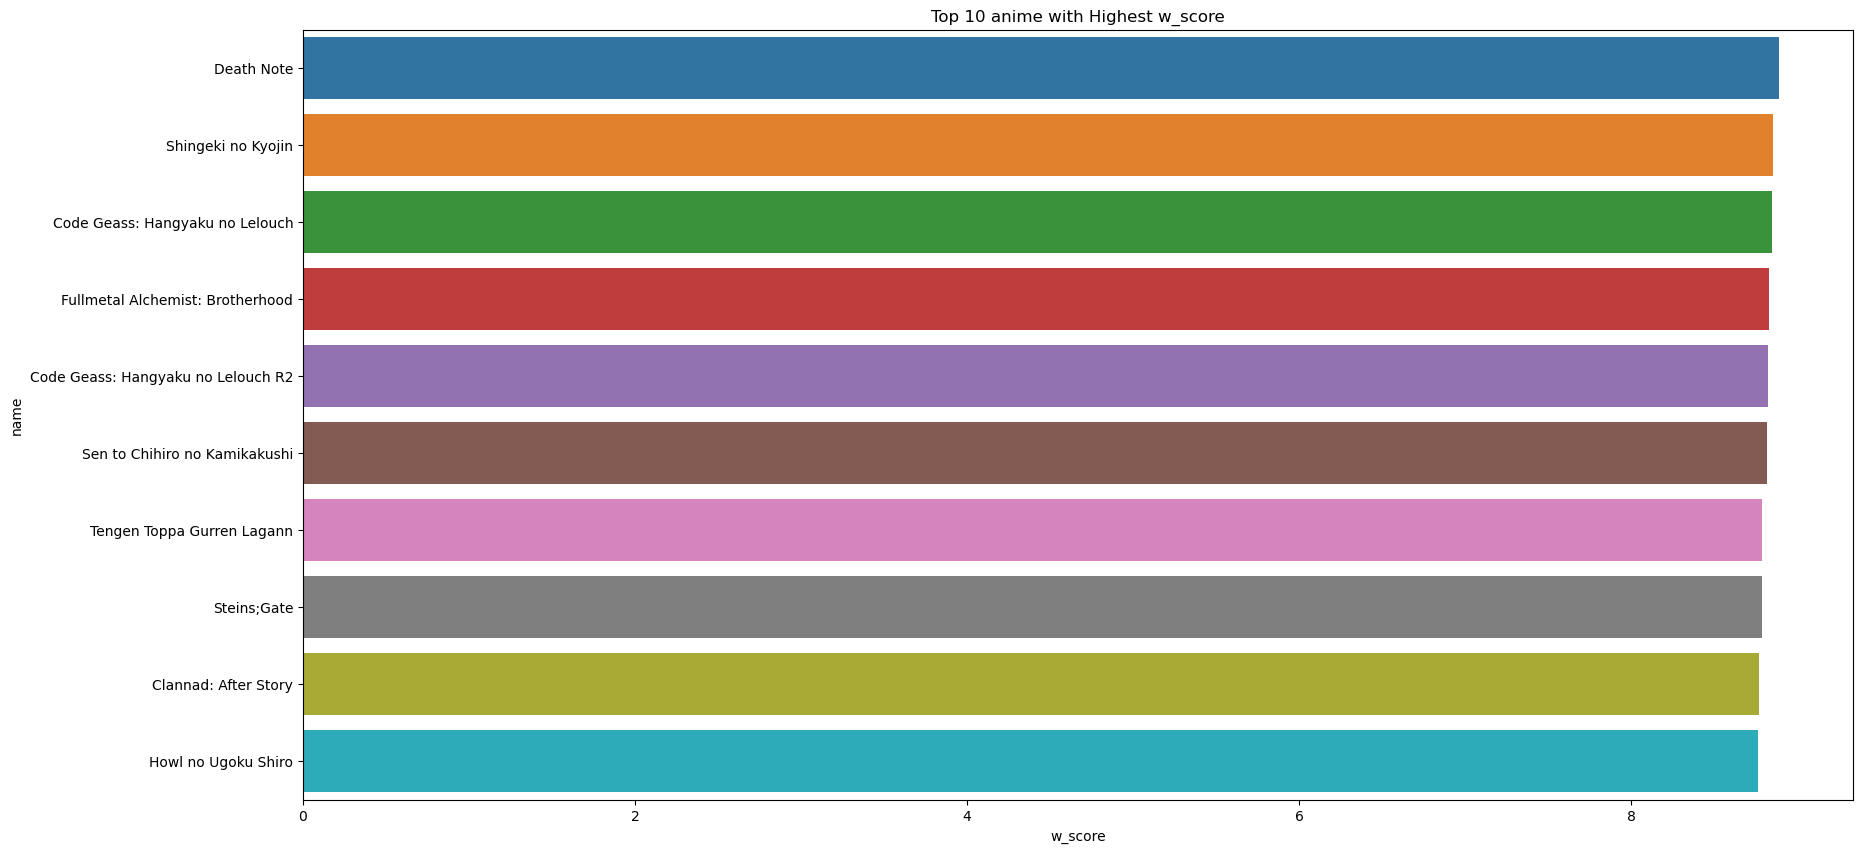

In [32]:
top_10_anime = pop_sort.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='w_score', y='name', data=top_10_anime)
plt.xlabel('w_score')
plt.ylabel('name')
plt.title('Top 10 anime with Highest w_score')
plt.show()

Топ 10 аниме с высоким рейтингом. Самое лучшее аниме по количеству оценок "Тетрадь смерти".

**Cистема рекомендаций по коллаборативной фильтрации (с использованием корреляции) (не работает)** 


In [33]:
new_df=df[df['user_id'].map(df['user_id'].value_counts()) > 200]  

In [34]:
new_df

,anime_id,name,genre,type,Anime_rating,user_id,Users_anime_rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,271,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,462,8
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,598,10
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,684,-1
...,...,...,...,...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,39532,-1
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,48766,-1
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,60365,4
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,5.0,27364,-1


In [35]:
users_pivot=new_df.pivot_table(index=["user_id"],columns=["name"],values="Anime_rating")
users_pivot.fillna(0,inplace=True)

In [36]:
users_pivot.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,orld Trigger,restler Gundan Seisenshi Robin Jr.,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,7.0,0.0,8.0,8.0,0.0,0.0,8.0,0.0


In [37]:
def same_anime(anime):
    users_vote_anime=users_pivot[anime]
    similar_with=users_pivot.corrwith(users_vote_anime)
    similar_with = pd.DataFrame(similar_with, columns=['correlation'])
    print(similar_with)
    df=similar_with.sort_values('correlation',ascending=False).head(10)
    print(df)
    df_sort=df[df['correlation']>0.8]
    return df_sort

In [38]:
same_anime('Death Note')

                                                    correlation
name                                                           
&quot;0&quot;                                          0.005779
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...     0.005127
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...     0.013249
&quot;Bungaku Shoujo&quot; Memoire                     0.008781
&quot;Bungaku Shoujo&quot; Movie                       0.005238
...                                                         ...
xxxHOLiC Kei                                           0.081139
xxxHOLiC Movie: Manatsu no Yoru no Yume                0.058774
xxxHOLiC Rou                                           0.052414
xxxHOLiC Shunmuki                                      0.056473
◯                                                      0.001376

[11150 rows x 1 columns]
                                    correlation
name                                           
Death Note                             1.00000

,correlation
name,
Death Note,1.0


**Коллаборативная фильтрация: модель NearestNeighbours из scikit-learn для вашей системы рекомендаций**

In [39]:
df.head()

,anime_id,name,genre,type,Anime_rating,user_id,Users_anime_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,278,-1


In [40]:
users_pivot

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,orld Trigger,restler Gundan Seisenshi Robin Jr.,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,7.0,0.0,8.0,8.0,0.0,0.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73502,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,8.0,8.0,0.0,8.0,0.0


In [41]:
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


anime_df_matrix = csr_matrix(users_pivot.values)

def find_similar_anime(name, num_neighbors=10):
    # Initialize the NearestNeighbors model
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(anime_df_matrix)
    
    # Find the index of the input book
    anime_index = users_pivot.columns.get_loc(name)
    
    # Query the nearest neighbors
    distances, indices = model_knn.kneighbors(anime_df_matrix[anime_index], n_neighbors=num_neighbors+1)
    # Exclude the first index (which is the input book itself)
    similar_indices = indices[0][1:]
    
    # Get the names of similar books based on indices
    list_similar_anime = [users_pivot.columns[idx] for idx in similar_indices]
    similar_anime=pd.DataFrame({"Similar anime to":list_similar_anime})
    return similar_anime


In [42]:
input_anime = "Hunter x Hunter"  
find_similar_anime(input_anime)

,Similar anime to
0,Queen&#039;s Blade: Rurou no Senshi
1,Mellow
2,Saint Beast: Seijuu Kourin-hen
3,Persona 3 the Movie Meets “ alkman”
4,Silent Mobius 2
5,Baku Ane: Otouto Shibocchau zo! The Animation
6,Kateikyoushi no Oneesan 2 The Animation: H no ...
7,Canary wa Kago no Naka
8,Choukou Sennin Haruka
9,Chagama Ondo


In [43]:
input_anime = "Boruto: Naruto the Movie"  
find_similar_anime(input_anime)

,Similar anime to
0,Elf 17
1,Soukou Kihei Votoms: Koei Futatabi
2,Idol Densetsu Eriko
3,Sanzoku no Musume Ronja
4,Fashion no Hajimari
5,Ghost in the Shell (2015)
6,Ajin Part 2: Shoutotsu
7,Video Girl Ai
8,Haiyoru! Nyaruani
9,Tetsujin 28-gou (2004)


In [44]:
anime_df_matrix = csr_matrix(users_pivot.values)

def find_favorite_anime(user_id, num_anime=10):
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(anime_df_matrix)
    anime_index = users_pivot.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(anime_df_matrix[anime_index], n_neighbors=num_anime+1)
    favorite_indices = indices[0][1:]
    list_favorite_anime = [users_pivot.columns[idx] for idx in favorite_indices]
    favorite_anime=pd.DataFrame({"favorite anime ":list_favorite_anime})
    return favorite_anime


In [45]:
user_id=5
find_favorite_anime(user_id)

,favorite anime
0,Inugami-san to Nekoyama-san
1,Decorator
2,Dareka no Manazashi
3,Neko no Sumu Shima
4,Tengen Toppa Gurren Lagann: Kirameki★Yoko Box ...
5,Alps Monogatari: atashi no Annette Specials
6,Numa no Taishou
7,Issho ni Sleeping: Sleeping with Hinako
8,Moyashimon CGI Anime
9,Machine-Doll wa Kizutsukanai


Косинусное сходство

In [46]:
users_pivot.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,orld Trigger,restler Gundan Seisenshi Robin Jr.,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,7.0,0.0,8.0,8.0,0.0,0.0,8.0,0.0


In [47]:
from sklearn.metrics.pairwise import cosine_similarity 

In [48]:
similarity_score = cosine_similarity(users_pivot.T)

In [49]:
similarity_score.shape

(11150, 11150)

In [50]:
similarity_score

array([[1.        , 0.20851441, 0.0666713 , ..., 0.05172606, 0.04631867,
        0.18650096],
       [0.20851441, 1.        , 0.03996804, ..., 0.03100868, 0.02776707,
        0.        ],
       [0.0666713 , 0.03996804, 1.        , ..., 0.18094601, 0.2075317 ,
        0.0357485 ],
       ...,
       [0.05172606, 0.03100868, 0.18094601, ..., 1.        , 0.82916246,
        0.0138675 ],
       [0.04631867, 0.02776707, 0.2075317 , ..., 0.82916246, 1.        ,
        0.01241781],
       [0.18650096, 0.        , 0.0357485 , ..., 0.0138675 , 0.01241781,
        1.        ]])

In [51]:
users_pivot2 = users_pivot.T

In [52]:
def recommend(name):
    index = np.where(users_pivot2.index==name)[0][0]
    similar_anime = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:11]
    
    data = []
    
    for i in similar_anime:
        item = []
        temp_df = anime[anime['name'] == users_pivot2.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('name')['name'].values))
        item.extend(list(temp_df.drop_duplicates('name')['genre'].values))
        item.extend(list(temp_df.drop_duplicates('name')['type'].values))
        
        data.append(item)
    return data

In [53]:
recommend("Bleach")

[['Naruto', 'Action, Comedy, Martial Arts, Shounen, Super Power', 'TV'],
 ['Fairy Tail', 'Action, Adventure, Comedy, Fantasy, Magic, Shounen', 'TV'],
 ['Ao no Exorcist', 'Action, Demons, Fantasy, Shounen, Supernatural', 'TV'],
 ['Bleach Movie 4: Jigoku-hen',
  'Action, Comedy, Shounen, Super Power, Supernatural',
  'Movie'],
 ['Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu',
  'Action, Comedy, Shounen, Super Power, Supernatural',
  'Movie'],
 ['Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru',
  'Action, Adventure, Shounen, Supernatural',
  'Movie'],
 ['Sword Art Online', 'Action, Adventure, Fantasy, Game, Romance', 'TV'],
 ['Fullmetal Alchemist: Brotherhood',
  'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
  'TV'],
 ['Bleach Movie 1: Memories of Nobody',
  'Action, Adventure, Super Power',
  'Movie'],
 ['Shingeki no Kyojin', 'Action, Drama, Fantasy, Shounen, Super Power', 'TV']]

#### Рекомендательная система по жанрам

In [54]:
new_df

,anime_id,name,genre,type,Anime_rating,user_id,Users_anime_rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,271,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,462,8
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,598,10
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,684,-1
...,...,...,...,...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,39532,-1
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,48766,-1
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,60365,4
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,5.0,27364,-1


In [55]:
copy_df = new_df.copy()

In [56]:
copy_df

,anime_id,name,genre,type,Anime_rating,user_id,Users_anime_rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,271,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,462,8
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,598,10
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,684,-1
...,...,...,...,...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,39532,-1
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,48766,-1
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,60365,4
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,5.0,27364,-1


In [57]:
copy_df.drop(columns=['user_id'], inplace=True)

In [58]:
copy_df.drop(columns=['Users_anime_rating'], inplace=True)

In [59]:
copy_df.drop(columns=['Anime_rating'], inplace=True)

In [60]:
copy_df

,anime_id,name,genre,type
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
...,...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie


In [61]:
copy_df.drop_duplicates() 

,anime_id,name,genre,type
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
2203,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
26774,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...
7813594,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
7813598,5543,Under orld,Hentai,OVA
7813602,5621,Violence Gekiga David no Hoshi,Hentai,OVA
7813605,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [62]:
copy_df = copy_df.drop_duplicates() 

In [63]:
copy_df.reset_index()

,index,anime_id,name,genre,type
0,2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,2203,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,26774,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...,...
11149,7813594,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
11150,7813598,5543,Under orld,Hentai,OVA
11151,7813602,5621,Violence Gekiga David no Hoshi,Hentai,OVA
11152,7813605,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [64]:
copy_df = copy_df.reset_index()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [66]:
tfidf_type_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_type_matrix = tfidf_type_vectorizer.fit_transform(copy_df['type'])

In [67]:
with open('tfidf_type_matrix.pkl','wb') as f:
    pickle.dump(tfidf_type_matrix,f)

In [70]:
type_cosine_sim = cosine_similarity(tfidf_type_matrix, tfidf_type_matrix)
type_cosine_sim.shape

(11154, 11154)

In [89]:
def recommend_by_genre(genre, cosine_sim=type_cosine_sim):
    genre_indices = copy_df[copy_df['genre'].str.contains(genre, case=False)].index.to_list()
    
    sim_scores = list(enumerate(cosine_sim[genre_indices[0]]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    recommendations = []
    for i, _ in sim_scores:
        name = copy_df.iloc[i]['name']
        genre = copy_df.iloc[i]['genre']
        recommendations.append(f"{name}")

    return recommendations

In [95]:
genre = 'Supernatural'
recommendations = recommend_by_genre(genre)
for rec in recommendations:
    print(rec)

Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Koe no Katachi
Sen to Chihiro no Kamikakushi
Ookami Kodomo no Ame to Yuki
Mononoke Hime
Suzumiya Haruhi no Shoushitsu
Mushishi Zoku Shou: Suzu no Shizuku
Howl no Ugoku Shiro
Kizumonogatari II: Nekketsu-hen
Kara no Kyoukai 5: Mujun Rasen


In [73]:
type_df = pd.DataFrame(copy_df)

In [74]:
type_df.to_csv('type.csv')

#### Рекомендательная система по контенту

In [75]:
new_df

,anime_id,name,genre,type,Anime_rating,user_id,Users_anime_rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,271,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,462,8
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,598,10
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,684,-1
...,...,...,...,...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,39532,-1
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,48766,-1
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,60365,4
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,5.0,27364,-1


In [76]:
content_df = new_df.copy()

In [77]:
content_df 

,anime_id,name,genre,type,Anime_rating,user_id,Users_anime_rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,271,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,462,8
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,598,10
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.0,684,-1
...,...,...,...,...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,39532,-1
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,48766,-1
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,5.0,60365,4
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,5.0,27364,-1


In [78]:
content_df.drop(columns=['user_id'], inplace=True)

content_df.drop(columns=['Users_anime_rating'], inplace=True)

content_df.drop(columns=['Anime_rating'], inplace=True)

In [79]:
content_df

,anime_id,name,genre,type
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
...,...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie


In [80]:
content_df.drop_duplicates() 

,anime_id,name,genre,type
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
2203,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
26774,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...
7813594,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
7813598,5543,Under orld,Hentai,OVA
7813602,5621,Violence Gekiga David no Hoshi,Hentai,OVA
7813605,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [81]:
content_df = copy_df.drop_duplicates() 

In [82]:
content_df

,index,anime_id,name,genre,type
0,2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,2203,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,26774,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...,...
11149,7813594,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
11150,7813598,5543,Under orld,Hentai,OVA
11151,7813602,5621,Violence Gekiga David no Hoshi,Hentai,OVA
11152,7813605,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [83]:
content_df['Description'] = content_df['name'] + ' ' + content_df['genre'] + ' ' + content_df['type']

In [84]:
content_df

,index,anime_id,name,genre,type,Description
0,2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,"Kimi no Na wa. Drama, Romance, School, Superna..."
1,2203,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,"Fullmetal Alchemist: Brotherhood Action, Adven..."
2,26774,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"Gintama° Action, Comedy, Historical, Parody, S..."
3,28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,"Steins;Gate Sci-Fi, Thriller TV"
4,47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"Gintama&#039; Action, Comedy, Historical, Paro..."
...,...,...,...,...,...,...
11149,7813594,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,Toushindai My Lover: Minami tai Mecha-Minami H...
11150,7813598,5543,Under orld,Hentai,OVA,Under orld Hentai OVA
11151,7813602,5621,Violence Gekiga David no Hoshi,Hentai,OVA,Violence Gekiga David no Hoshi Hentai OVA
11152,7813605,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,Violence Gekiga Shin David no Hoshi: Inma Dens...


In [85]:
tfidf_content_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_content_matrix = tfidf_content_vectorizer.fit_transform(content_df['Description'])

In [86]:
with open('tfidf_content_matrix.pkl','wb') as f:
    pickle.dump(tfidf_content_matrix,f)

In [80]:
content_cosine_sim = cosine_similarity(tfidf_content_matrix, tfidf_content_matrix)
content_cosine_sim.shape

(11154, 11154)

In [81]:
def recommend_by_content(name, cosine_sim=content_cosine_sim):
    idx = content_df[content_df['name'].str.lower() == name.lower()].index[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    
    recommendations = []
    for i, score in sim_scores:
        recommendations.append(f"{content_df.iloc[i]['name']}")
        recommendations.append(f"{content_df.iloc[i]['Description']}")
        
    return recommendations

In [82]:
name = 'Fullmetal Alchemist: Brotherhood'
recommendations = recommend_by_content(name)
for rec in recommendations:
    print(rec)

Fullmetal Alchemist: Brotherhood Specials
Fullmetal Alchemist: Brotherhood Specials Adventure, Drama, Fantasy, Magic, Military, Shounen Special
Fullmetal Alchemist
Fullmetal Alchemist Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen TV
Fullmetal Alchemist: Brotherhood - 4-Koma Theater
Fullmetal Alchemist: Brotherhood - 4-Koma Theater Comedy, Fantasy, Military, Parody Special
Fullmetal Alchemist: Reflections
Fullmetal Alchemist: Reflections Adventure, Comedy, Drama, Fantasy, Military, Shounen Special
Fullmetal Alchemist: The Sacred Star of Milos
Fullmetal Alchemist: The Sacred Star of Milos Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen Movie
Fullmetal Alchemist: The Conqueror of Shamballa
Fullmetal Alchemist: The Conqueror of Shamballa Comedy, Drama, Fantasy, Historical, Military, Shounen Movie
Fullmetal Alchemist: Premium Collection
Fullmetal Alchemist: Premium Collection Comedy, Fantasy, Shounen OVA
Fullmetal Alchemist: The Sacred Star of Milos

In [84]:
df_content = pd.DataFrame(content_df)

In [85]:
df_content.to_csv('content.csv')